In this exercise, K-Means Clustering Algorithm is used to predict the optimal number of clusters and then, represent it visually.

## Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans

## Importing the Dataset

In [2]:
Data = pd.read_csv("C:/Users/goyal/OneDrive/Documents/Python/Sparks Foundation/Iris.csv")

## Exploring the Dataset

In [3]:
Data.info()
Data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Preparing the Dataset

In [4]:
x = Data.iloc[:, 1:-1].values

## Using the elbow method to find the optimal number of clusters

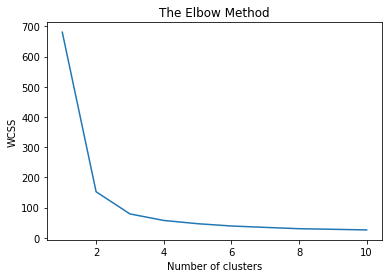

In [5]:
wccs = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x)
    wccs.append(kmeans.inertia_)
plt.plot(range(1, 11), wccs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()    

You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

From this we choose the number of clusters as '3'.

## Training the K-Means model on the dataset

In [6]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y = kmeans.fit_predict(x)

## Adding the KMeans results to a DataFrame

In [7]:
Clusters = pd.concat([Data, pd.DataFrame(y, columns = ['Cluster'])], axis = 1)
Clusters

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Cluster
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,2
146,147,6.3,2.5,5.0,1.9,Iris-virginica,0
147,148,6.5,3.0,5.2,2.0,Iris-virginica,2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2


## Visualising the Clusters based on Petal Properties

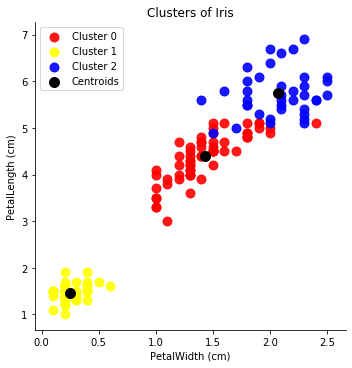

In [8]:
sns.lmplot( x="PetalWidthCm", y="PetalLengthCm", data=Clusters, fit_reg=False, hue='Cluster',legend=False, palette = {0:"red", 1:"yellow", 2:"blue"},scatter_kws={"s": 80, "alpha": 0.9})
plt.scatter(kmeans.cluster_centers_[:,3], kmeans.cluster_centers_[:,2], c='black', s = 100, label ='Centroids')
plt.title('Clusters of Iris')
plt.xlabel('PetalWidth (cm)')
plt.ylabel('PetalLength (cm)')
plt.legend(['Cluster 0','Cluster 1','Cluster 2','Centroids'])

## Visualising the Species based on Petal Properties

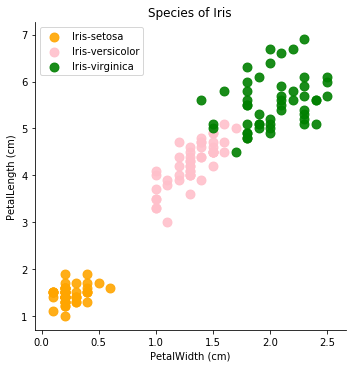

In [9]:
sns.lmplot( x="PetalWidthCm", y="PetalLengthCm", data=Clusters, fit_reg=False, hue='Species',legend=False, palette = {"Iris-setosa":"orange", "Iris-virginica":"green", "Iris-versicolor":"pink"},scatter_kws={"s": 80, "alpha": 0.9})
plt.title('Species of Iris')
plt.xlabel('PetalWidth (cm)')
plt.ylabel('PetalLength (cm)')
plt.legend()

Based on the above two scatterplots, it can be observed that plants belonging to Iris-setosa species are assigned to Cluster 1, those belonging to Iris-virginica are assigned to Cluster 0 whereas Iris-versicolor species is assigned to Cluster 2. These clusters though, are not entirely accurate.